In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [1]:
def playDice(side):
    return np.random.randint(side)+1

def tratarResultado(result):
    if(result <= 2):
        return -1
    elif(result <= 5):
        return 1
    else:
        return playDice(6)    

def testBadLuck(percentBadLuck):
    return np.random.random(1)[0] <= percentBadLuck

def play(rounds, epoch, dice, percentBadLuck):
    moves = [[0 for x in range(epoch)] for y in range(rounds)] 
    badLuck = 0
    for i in range(rounds):
        for j in range(epoch):
            resultDice = playDice(dice)
            moves[i][j] = moves[i][j-1] + tratarResultado(resultDice)
            if moves[i][j] < 0: moves[i][j] = 0
            if testBadLuck(percentBadLuck):
                moves[i][j] = 0
                badLuck += 1

    print("Bad Luck: " +str(badLuck))
    return moves

def plotChartLine(resultado):
    x = [x for x in range(len(resultado))]
    y = resultado
    plt.plot(x, y)       # line plot
    plt.plot(x, y, 'o')  # dot plot
    plt.show()           # <-- shows the plot (not needed with Ipython)

def plotHistogram(finalMove):
    df = pd.DataFrame({'Score': finalMove}, columns=['Score'])
    df.plot.hist(stacked=True, bins=50, alpha = 0.7)
    plt.show()

Bad Luck: 5
Lower value: 17
Highest value: 118
Average: 74.806
Median: 74.0
Variance: 291.388364
[[ 1  0  0 ..., 78 77 78]
 [ 1  2  4 ..., 71 70 71]
 [ 1  0  0 ..., 51 52 53]
 ..., 
 [ 0  1  2 ..., 56 57 58]
 [ 1  2  3 ..., 78 80 79]
 [ 4  5  6 ..., 87 86 85]]


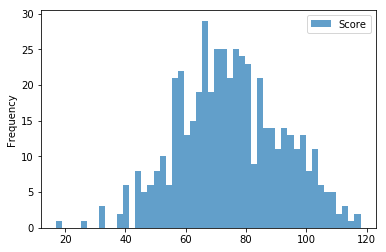

In [26]:
rounds = 500
epoch = 100
dice = 6
percentBadLuck = 0.0001
np_moves = np.array(play(rounds, epoch, dice, percentBadLuck)) #Play!
np_resultado = np.squeeze(np_moves[:, -1:])#converter array 2d to 1d
#np_resultado = np.array(list(map(lambda x: x[0], np_jogadas[:, -1:]))) #converter array 2d to 1d
#np_resultado.sort()
print("Lower value: " + str(np_resultado.min()))
print("Highest value: " + str(np_resultado.max()))
print("Average: " + str(np_resultado.mean()))
print("Median: " + str(np.median(np_resultado)))
print("Variance: " + str(np.var(np_resultado)))
#print(np_resultado) # Array 1d  with final score sorted 
print(np_moves) #Array 2d with all moves
plotHistogram(np_resultado)
#plotChartLine(np_moves) #Use only few values

[array([[ 1,  2,  6,  7,  8,  7, 10,  9,  8,  9,  8,  9, 10, 11, 10, 16, 17,
        18, 17, 18, 17, 18, 19, 20, 21, 22, 21, 22, 21, 22, 23, 24, 25, 28,
        29, 30, 31, 36, 35, 36, 35, 34, 35, 34, 35, 34, 35, 36, 37, 36, 35,
        36, 37, 43, 44, 45, 46, 47, 48, 50, 53, 57, 58, 59, 58, 59, 60, 61,
        66, 67, 68, 69, 70, 69, 70, 71, 70, 69, 68, 69, 70, 71, 70, 69, 70,
        69, 68, 69, 68, 69, 68, 69, 71, 72, 75, 74, 73, 74, 75, 76]])]


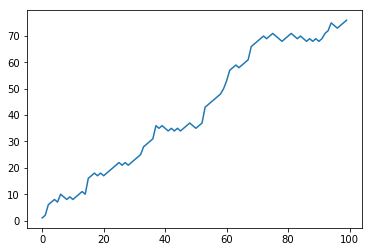

In [21]:
import matplotlib.pyplot as plt
print(np_moves)
plt.plot(np_moves[0][:])
plt.show()
